<a href="https://colab.research.google.com/github/adityaranjan08/CreditCardFraudDetection/blob/main/CreditCardFrauDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><font size="6">Credit Card Fraud Detection</font></center></h1>


<center><img src="https://images.unsplash.com/photo-1563013544-824ae1b704d3?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80" width="600"></img></center>


## Inference

The Credit Card Fraud Detection project is designed to identify fraudulent transactions within a dataset of credit card transactions. The primary objective is to develop a machine learning model that can effectively distinguish between legitimate and fraudulent transactions, aiding financial institutions in mitigating risks and preventing fraud.

### Contents Overview

1. **Introduction and Objective**:
   - An overview of the project highlighting the significance of fraud detection and stating the project's goals.

2. **Data Description**:
   - A detailed description of the dataset, including features, labels, and data sources.

3. **Data Preprocessing**:
   - Steps taken to handle missing values, normalize and scale data, and engineer features.

4. **Exploratory Data Analysis (EDA)**:
   - Statistical summaries and visualizations used to uncover patterns and insights within the data.

5. **Model Selection and Training**:
   - Discussion of various algorithms (e.g., Logistic Regression, Decision Trees, Random Forest) chosen for model training and their evaluation processes.

6. **Model Evaluation**:
   - Evaluation metrics (accuracy, precision, recall, F1-score, ROC-AUC) and model performance comparison to select the best model.

7. **Hyperparameter Tuning**:
   - Techniques like Grid Search or Random Search used to optimize model parameters.

8. **Final Model Testing**:
   - Testing the final model on unseen data and evaluating the results.

9. **Conclusion**:
   - Summary of the project's findings, discussion on the performance of the best model, and suggestions for future improvements.









In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read Data into a Dataframe
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
# Get a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.shape

(284807, 31)

In [6]:
# Checking null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
# <div style="background-color: #F2EBE6; padding: 15px; border-radius: 10px; border: 2px solid #8B4513;">
#     <h2 style="color: #8B4513;">Inference </h2>
#     <ul>
#         <li>Data Understanding
#         <li>It contains <b>284,807</b> entries and <b>31 columns.</b> entries.</li>
#         <li>All columns have non-null values..</li>
#         <li>The columns are labeled as 'Time', 'V1' through 'V28', 'Amount', and 'Class'..</li>
#         <li>The 'Class' column appears to be the target variable, with values indicating whether a transact






# Data Understanding
# The Dataset we use is the  Credit Card Fraud Detection Dataset.
# The Data has 31 features from V1-V28 which are unknown for confidentiality, TIme, Amount and Class
# The input features are V1-V28, Time and Amount
# The target variable is Class
# The Data does not have any missing values as evident from the below mentioned code, thus need not be handled
# The Data consists of all numerical features, and only the Target Variable Class is a categorical feature.
# Class 0: Legitimate Transaction
# Class 1: Fraud Transaction

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.759061e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.251130e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.654937e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.321385e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.649999e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,4.248366e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-3.054600e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,8.777971e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-1.179749e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


The Data does not have any missing values and hence, need not be handled.
The Data has only Target Variable Class as the categorical variable.
Remaining Features are numerical and need to be only standardized for comparison after balancing the dataset
The mean of the amount of money in transactions is 88.34
The standard deviation of amount of money in transactions is 250.12
The time is distributed throughout the data equitably and hence, serves as an independent feature
It is best to not remove or drop any data or features in this case and try to tune the model assuming them as independent features initially

In [10]:
# Check the distribution of the target variable
fraud=len(df[df['Class']==1])
genuine=len(df[df['Class']==0])
print('Number of Fraud Cases:',fraud)
print('Number of Non Fraud Cases:',genuine)

Number of Fraud Cases: 492
Number of Non Fraud Cases: 284315


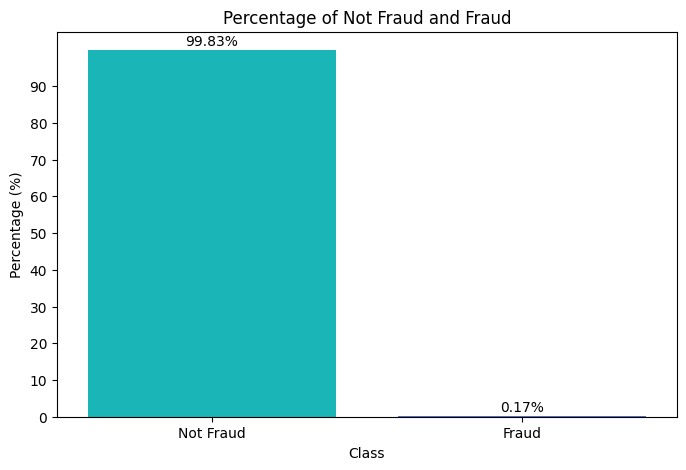

In [11]:
# Visualize the distribution of the target variable
percentage = df['Class'].value_counts(normalize=True)*100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette=['darkturquoise', 'royalblue'])
plt.title('Percentage of Not Fraud and Fraud')
plt.xlabel('Class')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Not Fraud', 'Fraud'])
plt.yticks(ticks=range(0,100,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

In [12]:
fraud=df[df['Class']==1]
genuine=df[df['Class']==0]

In [13]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

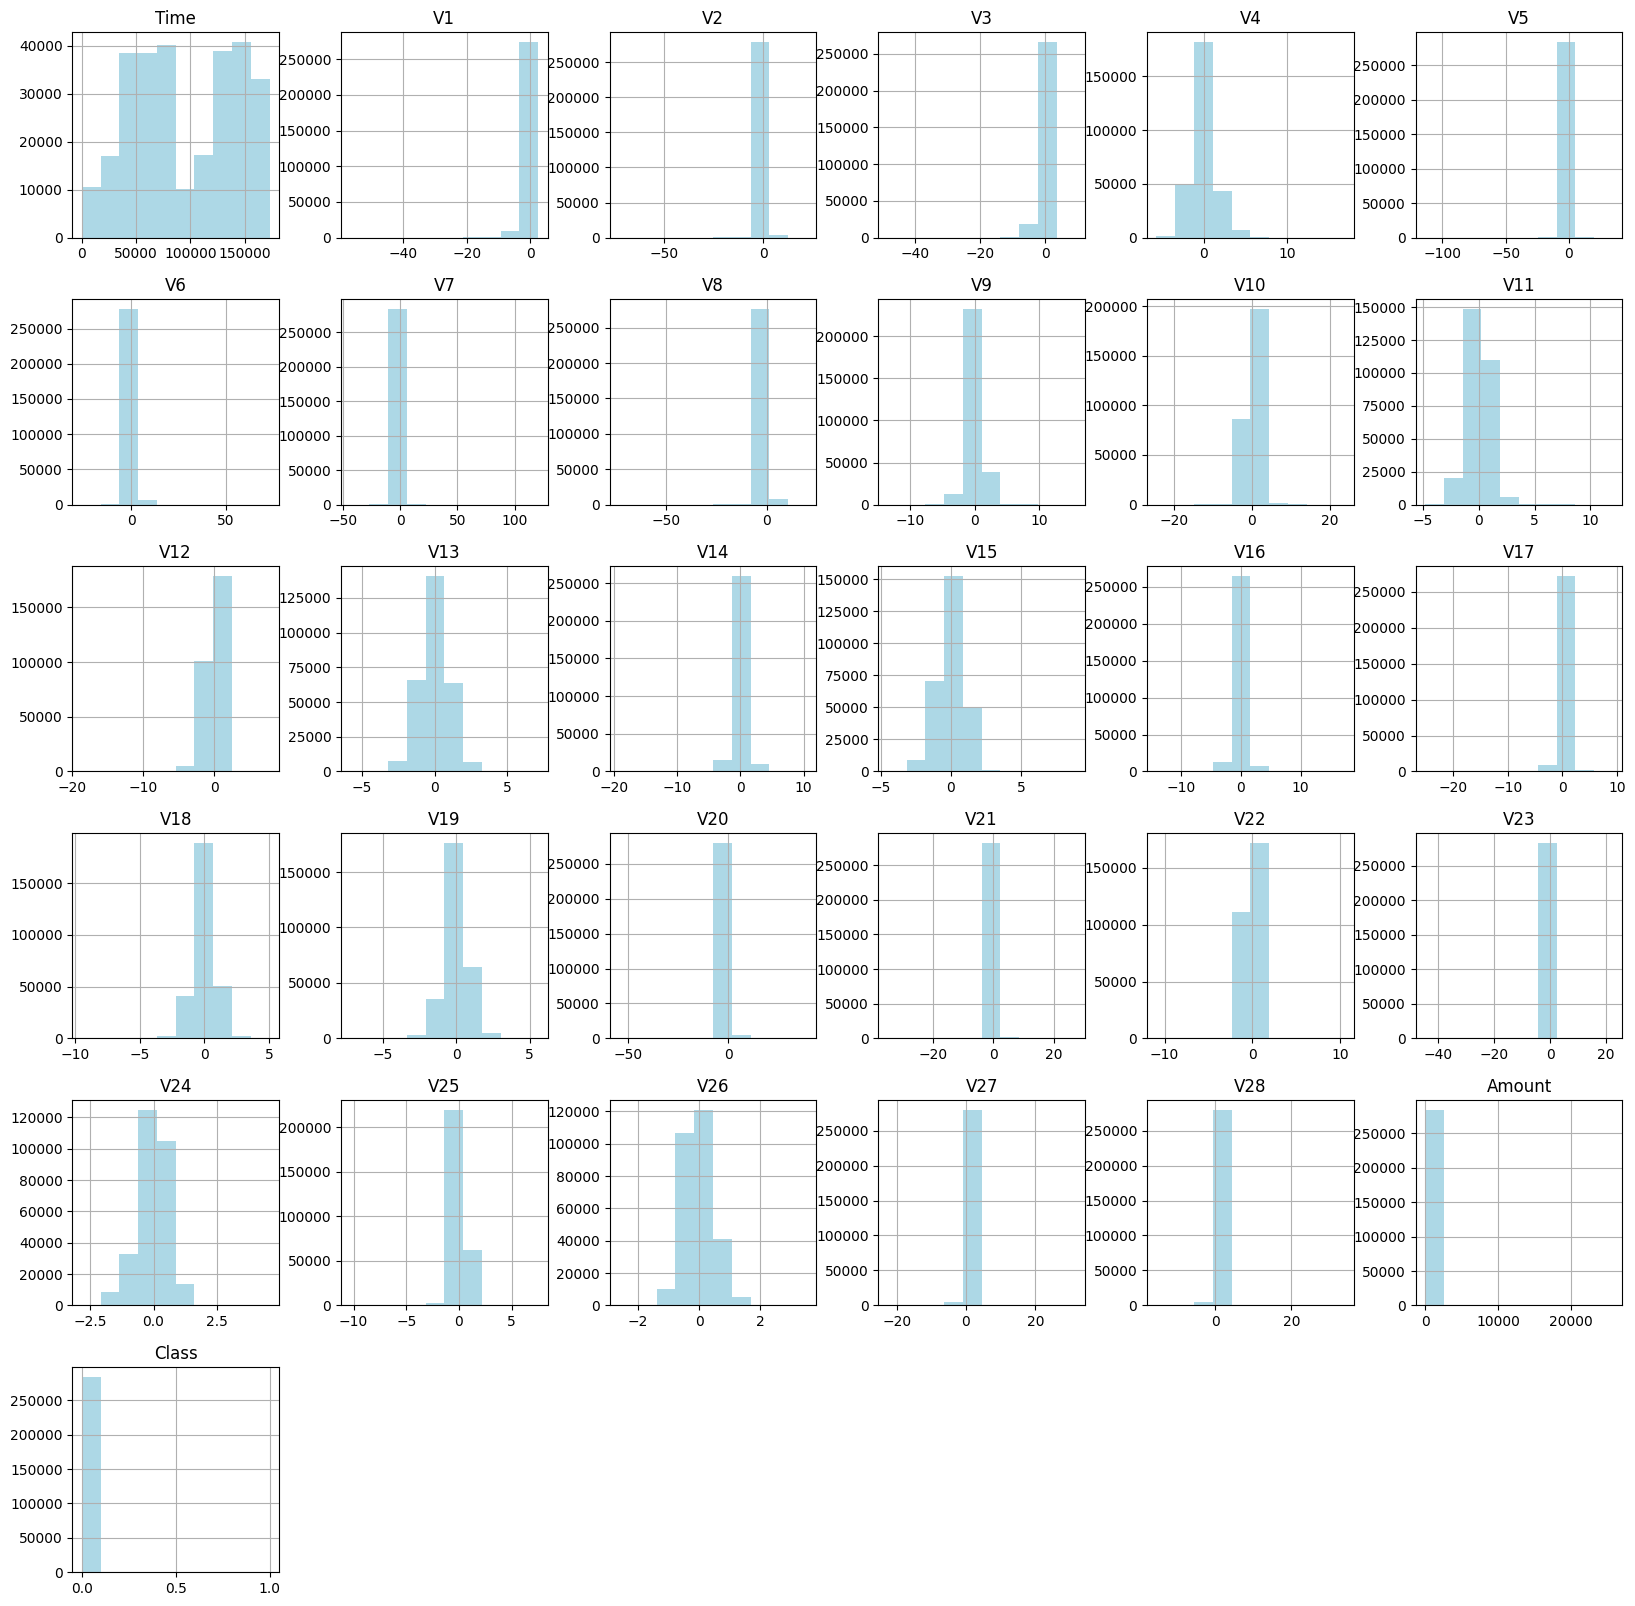

In [15]:
df.hist(figsize=(20,20),color='lightblue')
plt.show()

In [16]:
def pairplot_data_grid(data, feature1, feature2, target):
    '''
        Method to construct pairplot of the given feature wrt data
        Parameters:
            data(pd.DataFrame): Input Dataframe
            feature1(str): First Feature for Pair Plot
            feature2(str): Second Feature for Pair Plot
            target: Target or Label (y)
    '''

    sns.FacetGrid(data, hue=target,height=5,
    aspect=3,).map(plt.scatter, feature1, feature2).add_legend()
    plt.show()

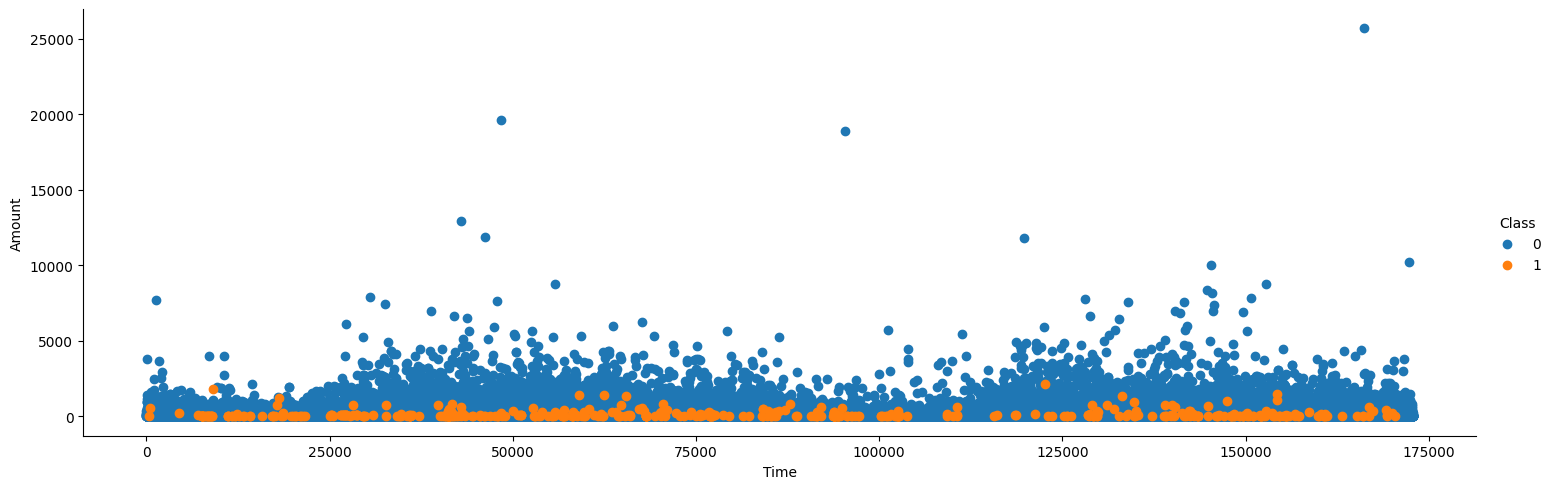

In [17]:
pairplot_data_grid(df, "Time", "Amount", "Class")

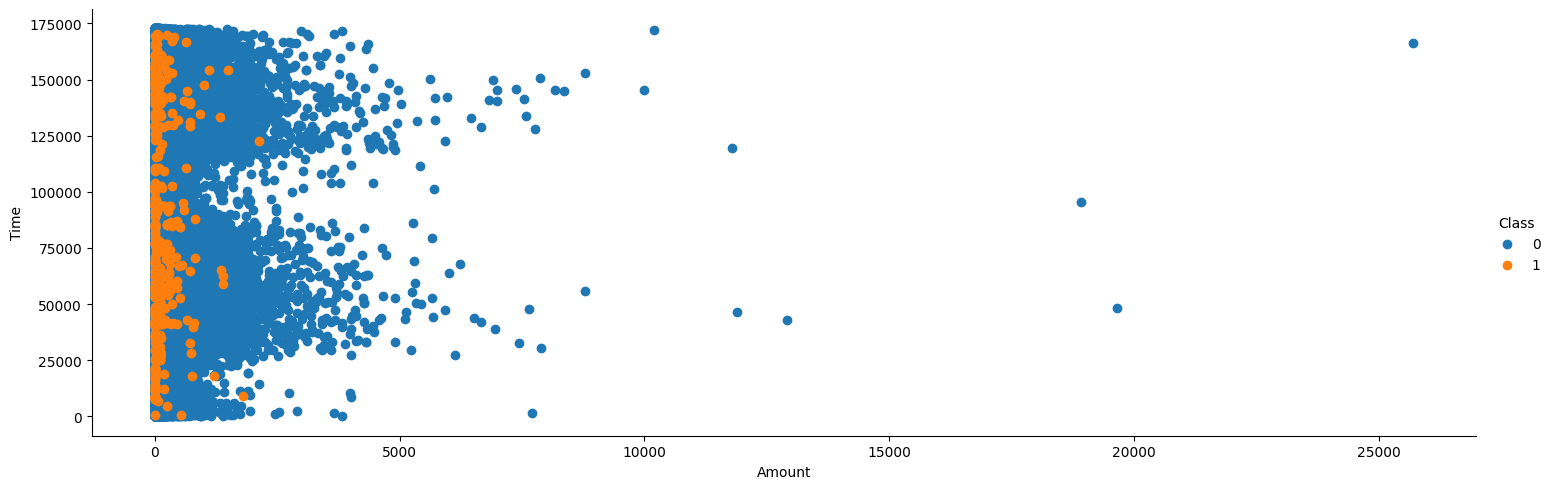

In [18]:
pairplot_data_grid(df, "Amount", "Time", "Class")

It can be observed that the fraud transactions are generally not above an amount of 2500.
It can also be observed that the fraud transactions are evenly distributed about time.

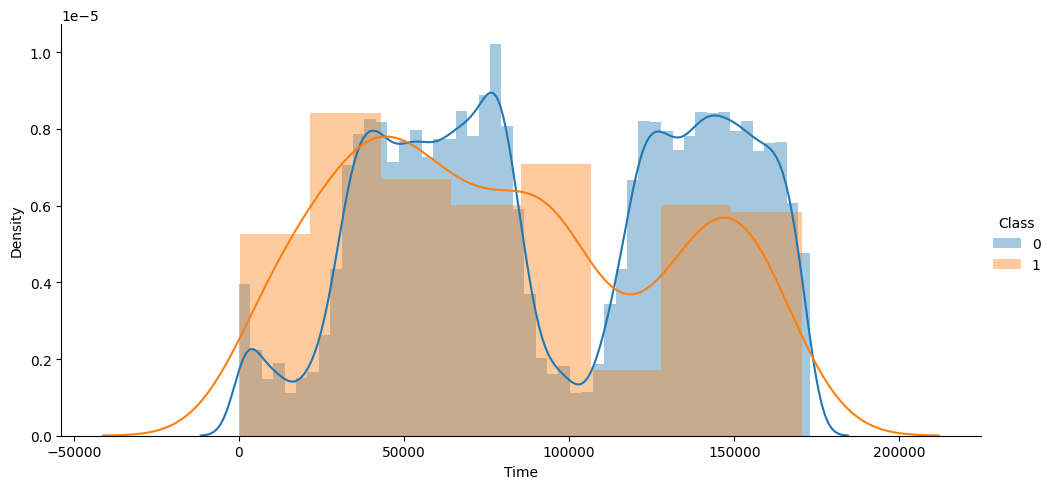

In [19]:
sns.FacetGrid(df, hue="Class", height=5, aspect=2).map(sns.distplot,"Time").add_legend()
plt.show()

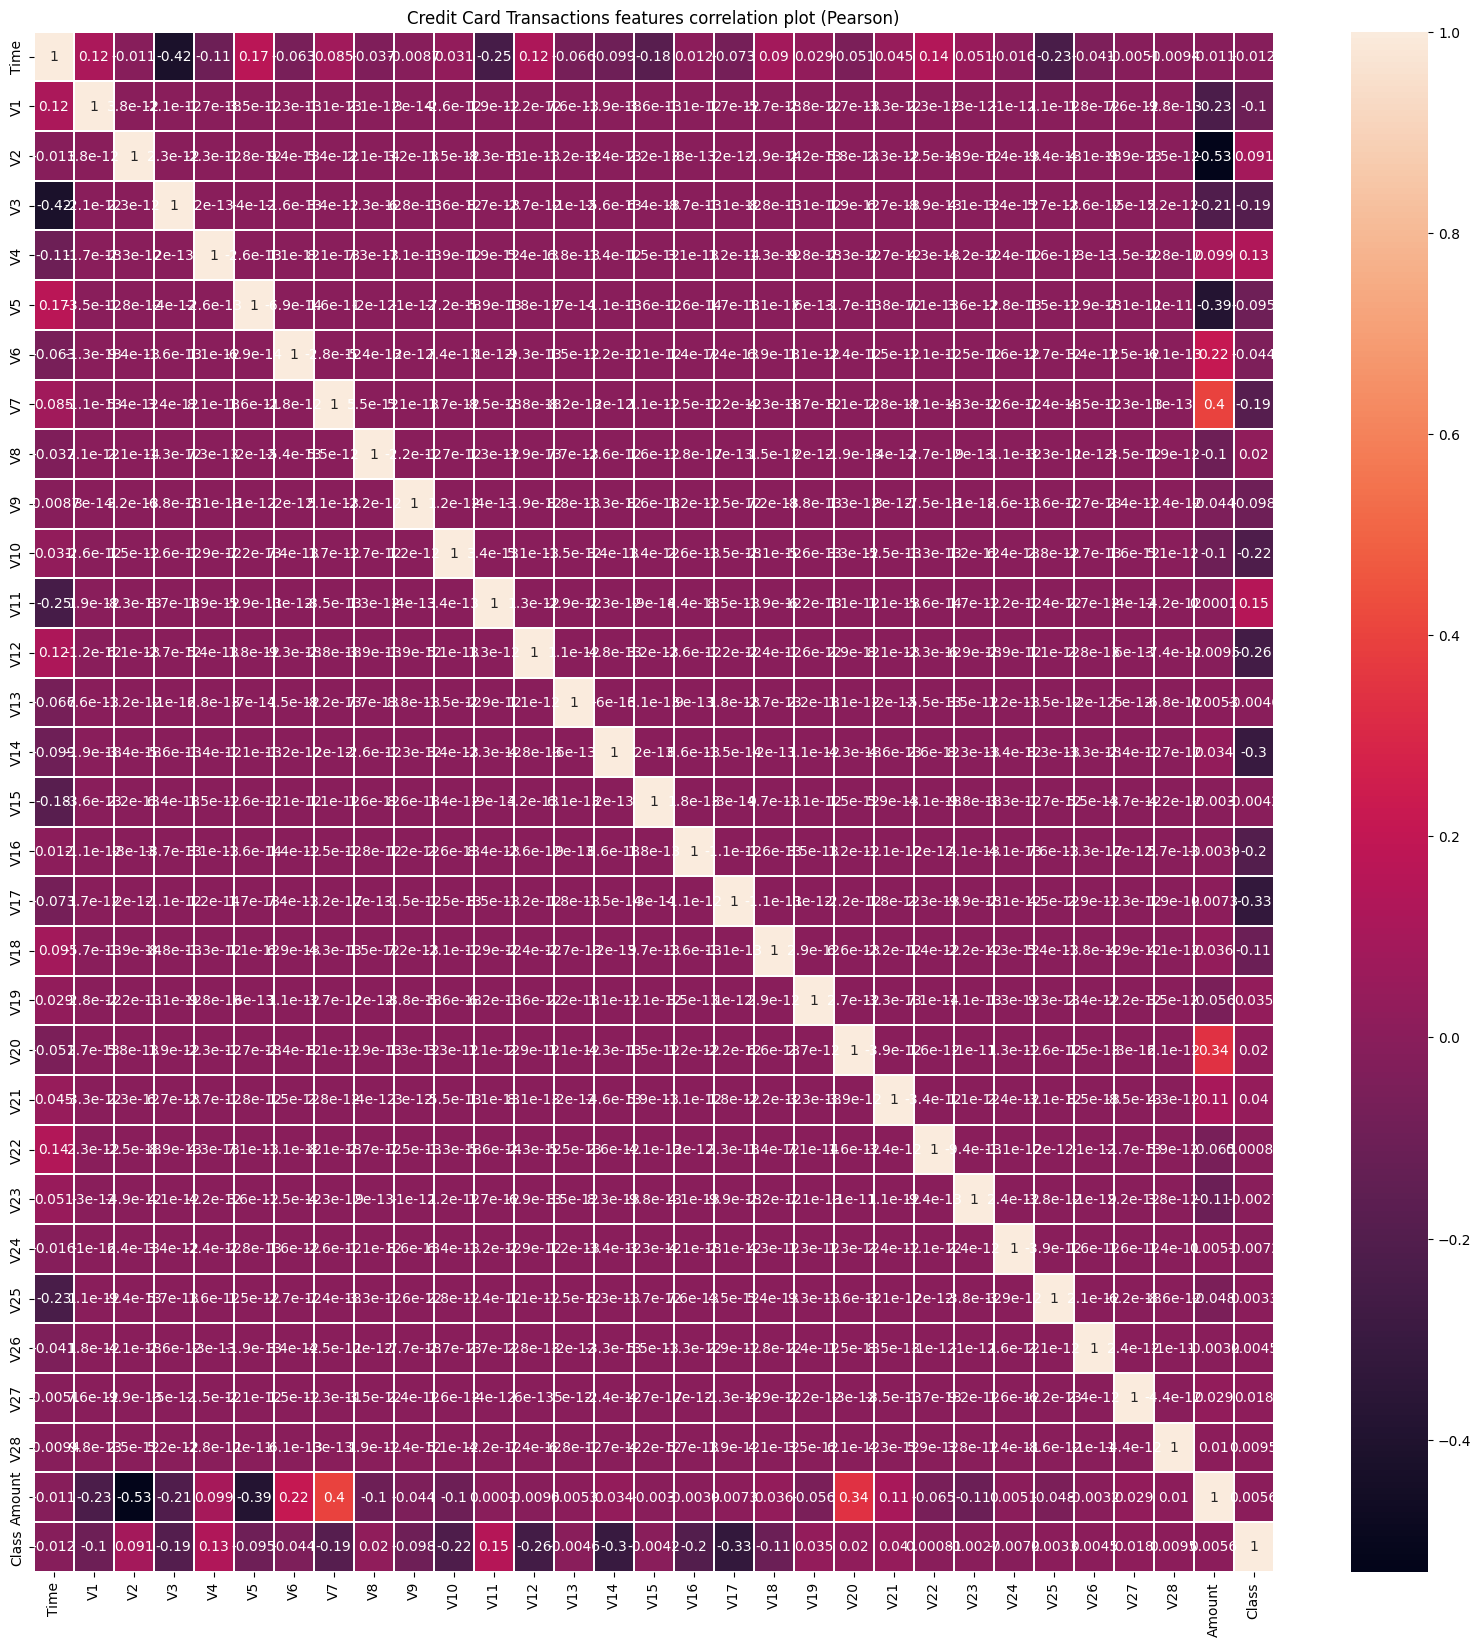

In [20]:
# Correlation matrix
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,linewidths=.1)

# Splitting the data into Features & Targets

In [21]:
X = df.drop(columns='Class', axis=1) #Features
y = df['Class']                      #Target Variable

In [22]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134998,  0.51435531]])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
smote = SMOTE(random_state=0)

X_train, y_train = smote.fit_resample(X_train,y_train)
X_test, y_test = smote.fit_resample(X_test,y_test)

In [25]:
y_train.value_counts()

Class
0    227451
1    227451
Name: count, dtype: int64

# Modeling

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [27]:
from tabulate import tabulate

In [28]:
# Create an empty list to store models
models = []

# Append models to the list
models.append(('LogisticRegression', LogisticRegression()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('XGBClassifier', XGBClassifier()))



# Print the list of models
print(models)


[('LogisticRegression', LogisticRegression()), ('KNeighborsClassifier', KNeighborsClassifier()), ('DecisionTreeClassifier', DecisionTreeClassifier()), ('RandomForestClassifier', RandomForestClassifier()), ('GaussianNB', GaussianNB()), ('SVC', SVC()), ('XGBClassifier', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=Non

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score


In [30]:
for name, model in models:
    print("\033[1mAlgorithm name : "+name+"\033[0m")
    model.fit(X_train,y_train)

    predictions=model.predict (X_test)

    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(predictions,y_test)
    print(cm)

    print("Accuracy Score :",end=" ")
    from sklearn.metrics import accuracy_score
    acc=accuracy_score(predictions,y_test)
    print(acc*100)

    print("Precision Score :",end=" ")
    p=precision_score(predictions,y_test)
    print(p*100)

    print("Recall Score :",end=" ")
    r=recall_score(predictions,y_test)
    print(r*100)

    print("F1 Score :",end=" ")
    f1=f1_score(predictions,y_test)
    print(f1*100)

    print("ROC-AUC Score :",end=" ")
    auc=roc_auc_score(predictions,y_test)
    print(auc*100)



Algorithm name : LogisticRegression
[[55379  5468]
 [ 1485 51396]]
Accuracy Score : 93.88629009566685
Precision Score : 90.38407428249859
Recall Score : 97.19180802178477
F1 Score : 93.66440384527769
ROC-AUC Score : 94.10266687512562
Algorithm name : KNeighborsClassifier
[[56753  6179]
 [  111 50685]]
Accuracy Score : 94.46925998874508
Precision Score : 89.13372256612267
Recall Score : 99.78147885660287
F1 Score : 94.15753297417795
ROC-AUC Score : 94.98147228281107
Algorithm name : DecisionTreeClassifier
[[56737  9680]
 [  127 47184]]
Accuracy Score : 91.37679375351716
Precision Score : 82.97692740574001
Recall Score : 99.73156348417915
F1 Score : 90.58603311735061
ROC-AUC Score : 92.57849083765247
Algorithm name : RandomForestClassifier
[[56850  8205]
 [   14 48659]]
Accuracy Score : 92.77310776589758
Precision Score : 85.57083567810918
Recall Score : 99.97123661989194
F1 Score : 92.21220993585189
ROC-AUC Score : 93.6794158658602
Algorithm name : GaussianNB
[[55416  7633]
 [ 1448 4923

#Hypertuning the Model


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load a dataset (e.g., Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a KNeighborsClassifier object
knn = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_knn = grid_search.best_estimator_

print("Best hyperparameters:", grid_search.best_params_)
print("Best KNN model:", best_knn)


Best hyperparameters: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}
Best KNN model: KNeighborsClassifier(n_neighbors=7)


#Model Deployment

In [32]:
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Save the model
joblib.dump(knn, 'knn_model.pkl')


['knn_model.pkl']

In [33]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

# Load the model
model = joblib.load('knn_model.pkl')

# Initialize the app
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = model.predict(np.array(data['features']).reshape(1, -1))
    return jsonify({'prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


### Summary

The project starts by addressing the problem of credit card fraud, emphasizing its impact on financial institutions. The goals include building an accurate machine learning model for fraud detection.

The dataset's key features and the binary classification label indicating fraud are described. Data preprocessing steps are explained, focusing on handling missing values and feature scaling.

EDA reveals patterns and insights in the data through statistical summaries and visualizations. Various machine learning models are trained and evaluated based on metrics like accuracy, precision, recall, F1-score, and ROC-AUC.

Hyperparameter tuning optimizes model performance, and the final model is tested on an unseen test set to assess its effectiveness in real-world scenarios.

In conclusion, the project highlights the findings, discusses the best model's performance, and suggests potential future improvements.